# Computing Allan variance and noise parameters from it

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import allan_variance

First generate a model signal containing additive white noise, flicker noise, random walk and deterministic ramp:

In [3]:
def generate_signal(n, dt, q_white, q_flicker, q_walk, q_ramp, random_state=0):
    rng = np.random.RandomState(random_state)
    white = allan_variance.generate_noise(0.0, n, dt=dt, scale=q_white, rng=rng)
    flicker = allan_variance.generate_noise(1.0, n, dt=dt, scale=q_flicker, rng=rng)
    walk = allan_variance.generate_noise(2.0, n, dt=dt, scale=q_walk, rng=rng)
    ramp = q_ramp * dt * np.arange(n)
    return white + flicker + walk + ramp

In [4]:
dt = 1e-2

In [5]:
x = generate_signal(1000000, dt, 0.1, 0.05, 0.05, 0.002)

Now compute AVAR curve using `compute_avar` function:

In [6]:
tau, avar = allan_variance.compute_avar(x, dt)

Text(0, 0.5, 'AVAR')

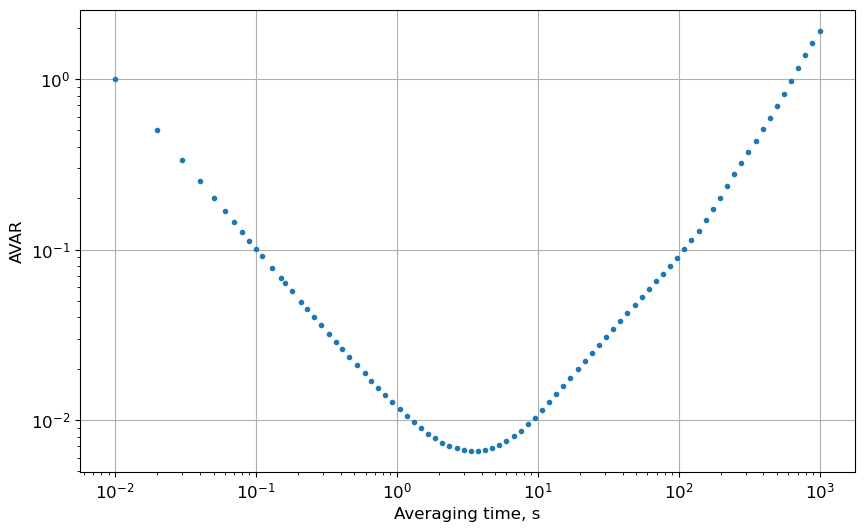

In [7]:
plt.loglog(tau, avar, '.')
plt.xlabel("Averaging time, s")
plt.ylabel("AVAR")

We clearly see a part with a slope of -1 corresponding to the white noise. At large averaging times AVAR is dominated by the linear ramp (slope is +2). The flicker noise and random walk parts are located between them.

We can automatically estimate the noise magnitudes using `estimate_parameters` function:

In [8]:
params, avar_pred = allan_variance.estimate_parameters(tau, avar)

In [9]:
params

quantization    0.000000
white           0.100501
flicker         0.042886
walk            0.051148
ramp            0.001427
Name: 0, dtype: float64

We see that the estimated parameters are close (max error of 25% for `ramp` parameter) to the model values. 
The estimate of quantiazation noise which wasn't included into the model is zero.

Finally we display the estimated AV curve along with computed actual values:

Text(0, 0.5, 'AVAR')

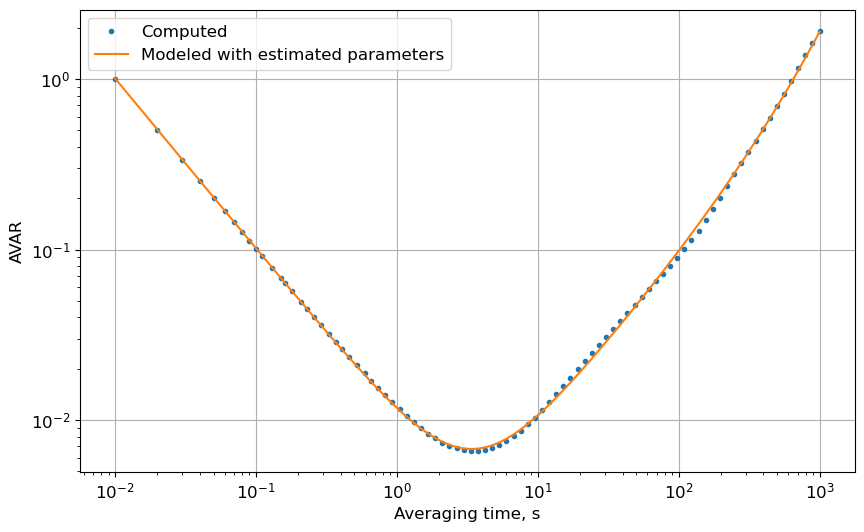

In [10]:
plt.loglog(tau, avar, '.', label='Computed')
plt.loglog(tau, avar_pred, label='Modeled with estimated parameters')
plt.legend()
plt.xlabel("Averaging time, s")
plt.ylabel("AVAR")